# Kingdomino Toy Game

The goal of this project is to master the gymnasium library to train an agent to play the game Kingdomino.
(Insert a presentation of the game Kingdomino)
Since Kingdomino is a complexe game as shown in (insert the paper about the NP completness of Kingdomino) we will start by implementing simplified version of the game (Toy game) to train agent in incrementaly complexe situation.
The roadmap for the toy game will be as follow :
Toy Game 1: Placing blank domino on a board
Toy Game 2: Placing colored domino on a board
Toy Game 3: Placing colored and crowned domino on a board to get the best score
Toy Game 4: Choosing domino from a set of dominos then placing them in order to get the best score
Toy Game 5: Playing domino against an oponent without the choice step
Toy Game 6: Playing domino against an opponnent with the choice step
Toy Game 7: Integrating Kingdomino special rule (Harmony, Middle ground, ...)

# Toy Game 1: Placing Blank Dominos

This first toy game consider an environement where the agent receive a blank domino of size 2x1 and had to place it on a 5x5 grid. The goal is to perfectly fill the grid in less step as possible. The only rule is that domino should not overlap and domino should touch themselves to be place except for the first one.

In [1]:
import gymnasium as gym
from gymnasium import spaces

class BasicTilePlacementEnv(gym.Env):
    def __init__(self):
        super(BasicTilePlacementEnv, self).__init__()
        self.board_size = 5  # Define the board size
        # Define the action space (x, y coordinates for tile placement)
        self.action_space = spaces.Tuple((spaces.Discrete(self.board_size),
                                   spaces.Discrete(self.board_size),
                                   spaces.Discrete(4)))  # 4 for up, down, left, right

        # Define the observation space (the state of the board)
        self.observation_space = spaces.Box(low=0, high=1,
                                            shape=(self.board_size, self.board_size),
                                            dtype=int)
        self.state = None  # To keep track of the board state
        self.is_first_move = True  # Initialize the is_first_move attribute here
        
    def is_valid_placement(self, start, direction):
        # Calculate the second tile's position based on direction
        if direction == 'up':
            end = (start[0] - 1, start[1])
        elif direction == 'down':
            end = (start[0] + 1, start[1])
        elif direction == 'left':
            end = (start[0], start[1] - 1)
        elif direction == 'right':
            end = (start[0], start[1] + 1)
        else:
            return False  # Invalid direction

        # Check for out-of-bounds or overlapping tiles
        if not (0 <= end[0] < self.board_size and 0 <= end[1] < self.board_size):
            return False
        if self.state[start[0]][start[1]] != 0 or self.state[end[0]][end[1]] != 0:
            return False

        # Check if the new domino touches at least one previously placed domino
        # This check is skipped for the first move
        if not self.is_first_move:
            touching = False
            for dx, dy in [(-1, 0), (1, 0), (0, -1), (0, 1)]:  # Check adjacent cells
                adj_cells = [(start[0] + dx, start[1] + dy), (end[0] + dx, end[1] + dy)]
                for x, y in adj_cells:
                    if 0 <= x < self.board_size and 0 <= y < self.board_size:
                        if self.state[x][y] == 1:  # Adjust this check based on your state representation
                            touching = True
            if not touching:
                return False
        else:
            self.is_first_move = False

        return True  # The placement is valid

    def check_game_over(self):
    # Vérifie s'il reste des cases vides
    #for row in self.state:
        #if 0 in row:
            #return False

        # Vérifie s'il existe encore des mouvements valides
        for i in range(len(self.state)):
            for j in range(len(self.state[0])):
                if self.state[i][j] == 0:
                    # Vérifie les cases adjacentes (haut, bas, gauche, droite)
                    if (i > 0 and self.state[i - 1][j] == 0) or \
                       (i < len(self.state) - 1 and self.state[i + 1][j] == 0) or \
                       (j > 0 and self.state[i][j - 1] == 0) or \
                       (j < len(self.state[0]) - 1 and self.state[i][j + 1] == 0):
                        return False

        # Si aucune case vide n'est trouvée et aucun mouvement valide n'est possible, le jeu est terminé
        return True

        
    def step(self, action):
        # Decode the action into position (x, y) and orientation (0: up, 1: down, 2: left, 3: right)
        x, y, orientation = action
        directions = ['up', 'down', 'left', 'right']
        direction = directions[orientation]

        # Check if the placement is valid
        if not self.is_valid_placement((x, y), direction):
            # Penalize invalid moves to discourage them
            return self.state, -1, False, {"reason": "Invalid placement"}

        # Calculate the second tile's position based on the direction of the first tile
        if direction == 'up':
            second_tile = (x - 1, y)
        elif direction == 'down':
            second_tile = (x + 1, y)
        elif direction == 'left':
            second_tile = (x, y - 1)
        elif direction == 'right':
            second_tile = (x, y + 1)

        # Place the domino on the board
        self.state[x][y] = 1
        self.state[second_tile[0]][second_tile[1]] = 1

        # Check if the game is done (e.g., no more valid moves, or board is filled)
        done = self.check_game_over()

        # Define the reward mechanism; simple example: +1 for each successful move
        reward = 1

        # Optionally, provide additional info about the step
        info = {}

        return self.state, reward, done, info



    def reset(self):
        # Reset the environment to an initial state
        self.state = [[0 for _ in range(self.board_size)] for _ in range(self.board_size)]
        self.is_first_move = True  # Reset is_first_move to True at the start of each episode
        return self.state  # Return the initial state

    def render(self, mode='human'):
        for row in self.state:
            print(' '.join(['X' if cell == 1 else '.' for cell in row]))
        print()  # Add a newline for better separation between steps



In [2]:
env = BasicTilePlacementEnv()
env.reset()
done = False
number_of_step = 0
while not done:  # Attempt to place some tiles
    action = env.action_space.sample()  # Randomly sample an action
    state, reward, done, info = env.step(action)
    number_of_step = number_of_step + 1
    if done:
        print("Board filled, resetting.")
        env.reset()

Board filled, resetting.


In [3]:
# Create an instance of the environment
env = BasicTilePlacementEnv()

# Initialize the environment
state = env.reset()

# Number of steps to simulate
num_steps = 5

# Simulate some steps and render the state after each step
for _ in range(num_steps):
    action = env.action_space.sample()  # Randomly sample an action
    state, reward, done, info = env.step(action)
    env.render()  # Visualize the current state
    print(state)
    print(done)
    
    if done:
        print("The board is filled or a terminal state is reached.")
        break

. . . . .
. X X . .
. . . . .
. . . . .
. . . . .

[[0, 0, 0, 0, 0], [0, 1, 1, 0, 0], [0, 0, 0, 0, 0], [0, 0, 0, 0, 0], [0, 0, 0, 0, 0]]
False
. . . . .
. X X . .
. . . . .
. . . . .
. . . . .

[[0, 0, 0, 0, 0], [0, 1, 1, 0, 0], [0, 0, 0, 0, 0], [0, 0, 0, 0, 0], [0, 0, 0, 0, 0]]
False
. . . . .
. X X . .
. . . . .
. . . . .
. . . . .

[[0, 0, 0, 0, 0], [0, 1, 1, 0, 0], [0, 0, 0, 0, 0], [0, 0, 0, 0, 0], [0, 0, 0, 0, 0]]
False
. . . . .
. X X . .
. . . . .
. . . . .
. . . . .

[[0, 0, 0, 0, 0], [0, 1, 1, 0, 0], [0, 0, 0, 0, 0], [0, 0, 0, 0, 0], [0, 0, 0, 0, 0]]
False
. . . . .
. X X . .
. . X X .
. . . . .
. . . . .

[[0, 0, 0, 0, 0], [0, 1, 1, 0, 0], [0, 0, 1, 1, 0], [0, 0, 0, 0, 0], [0, 0, 0, 0, 0]]
False


In [4]:
env = BasicTilePlacementEnv()
number_of_episode = 5
for episode in range(number_of_episode):
    env.reset()
    done = False
    number_of_step = 0
    while not done:  # Attempt to place some tiles
        action = env.action_space.sample()  # Randomly sample an action
        state, reward, done, info = env.step(action)
        number_of_step = number_of_step + 1
        if done:
            print("Board filled, resetting.")
            print(number_of_step)
    env.render()
        

Board filled, resetting.
63
. X . X X
X X X X X
X . X X .
X X X X X
X X X . X

Board filled, resetting.
79
X X X X .
X X X X X
X X X X X
X X . X X
X X X X .

Board filled, resetting.
181
X X X X X
X X X X X
. X X X X
X X X X X
X X X X X

Board filled, resetting.
77
. X . X X
X X X X X
X X X X X
. X . X X
X X X X .

Board filled, resetting.
117
X X X X X
X X X X X
X X X X X
X X X X X
. X X X X



## Matplotlib render

In [5]:
import matplotlib.pyplot as plt
import numpy as np

def render(self, mode='human'):
    fig, ax = plt.subplots()
    ax.set_xlim(0, self.board_size)
    ax.set_ylim(0, self.board_size)
    ax.set_xticks(np.arange(0, self.board_size, 1))
    ax.set_yticks(np.arange(0, self.board_size, 1))
    
    # Draw gridlines
    ax.grid(which='both', color='k', linestyle='-', linewidth=1)
    ax.set_xticklabels([])
    ax.set_yticklabels([])
    
    # Fill in tiles
    for x in range(self.board_size):
        for y in range(self.board_size):
            if self.state[x][y] == 1:
                ax.add_patch(plt.Rectangle((y, self.board_size - x - 1), 1, 1, fill=True, color='blue'))
            else:
                ax.add_patch(plt.Rectangle((y, self.board_size - x - 1), 1, 1, fill=False))
    
    plt.show()

In [6]:
import gymnasium as gym
from gymnasium import spaces
import matplotlib.pyplot as plt
import numpy as np

class BasicTilePlacementEnv(gym.Env):
    def __init__(self):
        super(BasicTilePlacementEnv, self).__init__()
        self.board_size = 5  # Define the board size
        # Define the action space (x, y coordinates for tile placement)
        self.action_space = spaces.Tuple((spaces.Discrete(self.board_size),
                                   spaces.Discrete(self.board_size),
                                   spaces.Discrete(4)))  # 4 for up, down, left, right

        # Define the observation space (the state of the board)
        self.observation_space = spaces.Box(low=0, high=1,
                                            shape=(self.board_size, self.board_size),
                                            dtype=int)
        self.state = None  # To keep track of the board state
        self.is_first_move = True  # Initialize the is_first_move attribute here
        
    def is_valid_placement(self, start, direction):
        # Calculate the second tile's position based on direction
        if direction == 'up':
            end = (start[0] - 1, start[1])
        elif direction == 'down':
            end = (start[0] + 1, start[1])
        elif direction == 'left':
            end = (start[0], start[1] - 1)
        elif direction == 'right':
            end = (start[0], start[1] + 1)
        else:
            return False  # Invalid direction

        # Check for out-of-bounds or overlapping tiles
        if not (0 <= end[0] < self.board_size and 0 <= end[1] < self.board_size):
            return False
        if self.state[start[0]][start[1]] != 0 or self.state[end[0]][end[1]] != 0:
            return False

        # Check if the new domino touches at least one previously placed domino
        # This check is skipped for the first move
        if not self.is_first_move:
            touching = False
            for dx, dy in [(-1, 0), (1, 0), (0, -1), (0, 1)]:  # Check adjacent cells
                adj_cells = [(start[0] + dx, start[1] + dy), (end[0] + dx, end[1] + dy)]
                for x, y in adj_cells:
                    if 0 <= x < self.board_size and 0 <= y < self.board_size:
                        if self.state[x][y] == 1:  # Adjust this check based on your state representation
                            touching = True
            if not touching:
                return False
        else:
            self.is_first_move = False

        return True  # The placement is valid

    def check_game_over(self):
    # Vérifie s'il reste des cases vides
    #for row in self.state:
        #if 0 in row:
            #return False

        # Vérifie s'il existe encore des mouvements valides
        for i in range(len(self.state)):
            for j in range(len(self.state[0])):
                if self.state[i][j] == 0:
                    # Vérifie les cases adjacentes (haut, bas, gauche, droite)
                    if (i > 0 and self.state[i - 1][j] == 0) or \
                       (i < len(self.state) - 1 and self.state[i + 1][j] == 0) or \
                       (j > 0 and self.state[i][j - 1] == 0) or \
                       (j < len(self.state[0]) - 1 and self.state[i][j + 1] == 0):
                        return False

        # Si aucune case vide n'est trouvée et aucun mouvement valide n'est possible, le jeu est terminé
        return True

        
    def step(self, action):
        # Decode the action into position (x, y) and orientation (0: up, 1: down, 2: left, 3: right)
        x, y, orientation = action
        directions = ['up', 'down', 'left', 'right']
        direction = directions[orientation]

        # Check if the placement is valid
        if not self.is_valid_placement((x, y), direction):
            # Penalize invalid moves to discourage them
            return self.state, -1, False, {"reason": "Invalid placement"}

        # Calculate the second tile's position based on the direction of the first tile
        if direction == 'up':
            second_tile = (x - 1, y)
        elif direction == 'down':
            second_tile = (x + 1, y)
        elif direction == 'left':
            second_tile = (x, y - 1)
        elif direction == 'right':
            second_tile = (x, y + 1)

        # Place the domino on the board
        self.state[x][y] = 1
        self.state[second_tile[0]][second_tile[1]] = 1

        # Check if the game is done (e.g., no more valid moves, or board is filled)
        done = self.check_game_over()

        # Define the reward mechanism; simple example: +1 for each successful move
        reward = 1

        # Optionally, provide additional info about the step
        info = {}

        return self.state, reward, done, info



    def reset(self):
        # Reset the environment to an initial state
        self.state = [[0 for _ in range(self.board_size)] for _ in range(self.board_size)]
        # Set the center position to 1
        center_row = self.board_size // 2
        center_col = self.board_size // 2
        self.state[center_row][center_col] = 1
        self.is_first_move = True  # Reset is_first_move to True at the start of each episode
        return self.state  # Return the initial state

    

    def render(self, mode='human'):
        fig, ax = plt.subplots()
        ax.set_xlim(0, self.board_size)
        ax.set_ylim(0, self.board_size)
        ax.set_xticks(np.arange(0, self.board_size, 1))
        ax.set_yticks(np.arange(0, self.board_size, 1))

        # Draw gridlines
        ax.grid(which='both', color='k', linestyle='-', linewidth=1)
        ax.set_xticklabels([])
        ax.set_yticklabels([])

        # Fill in tiles
        for x in range(self.board_size):
            for y in range(self.board_size):
                if self.state[x][y] == 1:
                    ax.add_patch(plt.Rectangle((y, self.board_size - x - 1), 1, 1, fill=True, color='blue'))
                else:
                    ax.add_patch(plt.Rectangle((y, self.board_size - x - 1), 1, 1, fill=False))

        plt.show()


Board filled, resetting.
71


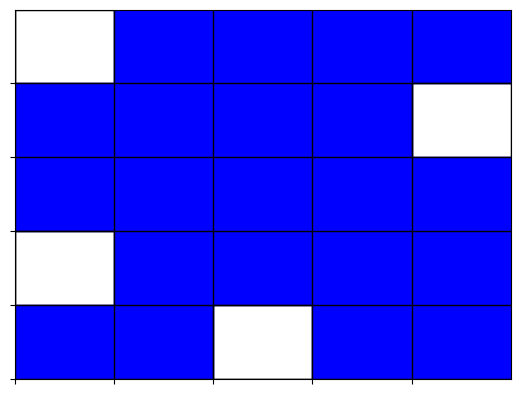

Board filled, resetting.
75


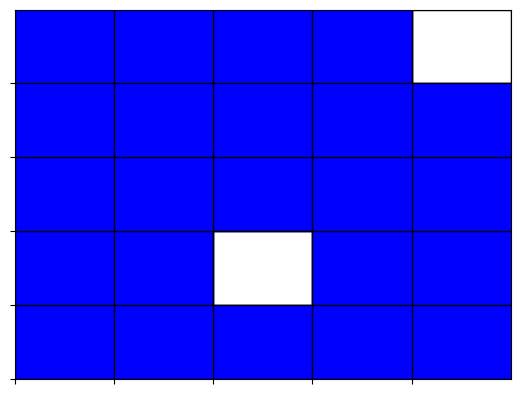

Board filled, resetting.
141


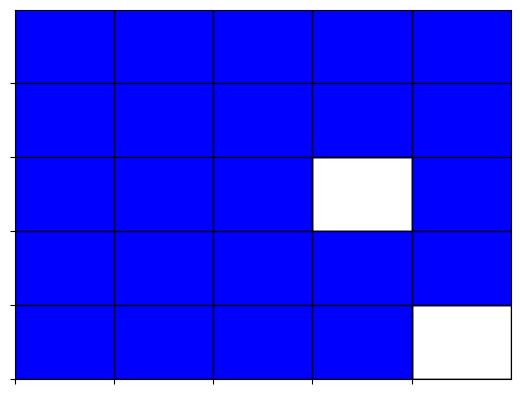

Board filled, resetting.
52


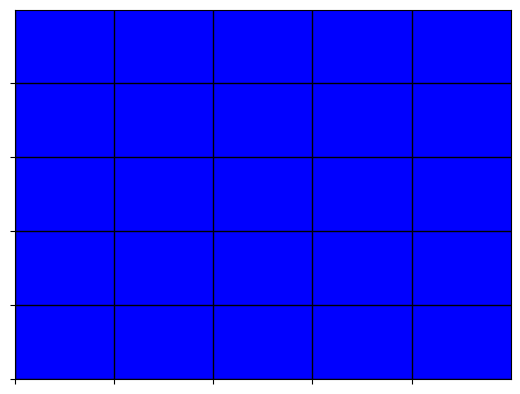

Board filled, resetting.
36


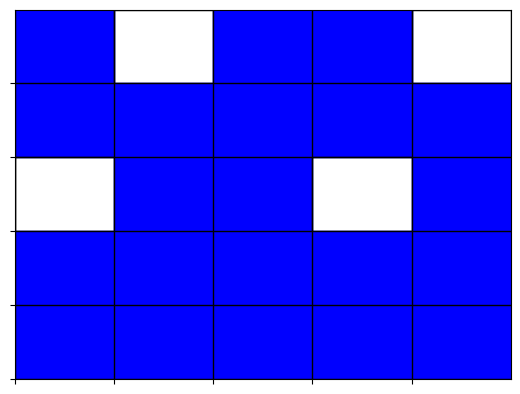

In [7]:
env = BasicTilePlacementEnv()
number_of_episode = 5
for episode in range(number_of_episode):
    env.reset()
    done = False
    number_of_step = 0
    while not done:  # Attempt to place some tiles
        action = env.action_space.sample()  # Randomly sample an action
        state, reward, done, info = env.step(action)
        number_of_step = number_of_step + 1
        if done:
            print("Board filled, resetting.")
            print(number_of_step)
    env.render()        

In [8]:
env.reset()
env.state

[[0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0],
 [0, 0, 1, 0, 0],
 [0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0]]

In [9]:
from gymnasium.envs.registration import register

register(
    id='BasicTilePlacement-v0',
    entry_point='Toy_game_kingdomino:BasicTilePlacementEnv',
)


Correcting the environnement so now the game start with a tile on the middle to stick to the kingdomino environment

In [10]:
import gymnasium as gym
from gymnasium import spaces
import matplotlib.pyplot as plt
import numpy as np

class BasicTilePlacementEnv(gym.Env):
    def __init__(self):
        super(BasicTilePlacementEnv, self).__init__()
        self.board_size = 5  # Define the board size
        # Define the action space (x, y coordinates for tile placement)
        self.action_space = spaces.Tuple((spaces.Discrete(self.board_size),
                                   spaces.Discrete(self.board_size),
                                   spaces.Discrete(4)))  # 4 for up, down, left, right

        # Define the observation space (the state of the board)
        self.observation_space = spaces.Box(low=0, high=1,
                                            shape=(self.board_size, self.board_size),
                                            dtype=int)
        self.state = None  # To keep track of the board state
        
    def is_valid_placement(self, start, direction):
        # Calculate the second tile's position based on direction
        if direction == 'up':
            end = (start[0] - 1, start[1])
        elif direction == 'down':
            end = (start[0] + 1, start[1])
        elif direction == 'left':
            end = (start[0], start[1] - 1)
        elif direction == 'right':
            end = (start[0], start[1] + 1)
        else:
            return False  # Invalid direction

        # Check for out-of-bounds or overlapping tiles
        if not (0 <= end[0] < self.board_size and 0 <= end[1] < self.board_size):
            return False
        if self.state[start[0]][start[1]] != 0 or self.state[end[0]][end[1]] != 0:
            return False

        # Check if the new domino touches at least one previously placed domino
        touching = False
        for dx, dy in [(-1, 0), (1, 0), (0, -1), (0, 1)]:  # Check adjacent cells
            adj_cells = [(start[0] + dx, start[1] + dy), (end[0] + dx, end[1] + dy)]
            for x, y in adj_cells:
                if 0 <= x < self.board_size and 0 <= y < self.board_size:
                    if self.state[x][y] == 1:  # Adjust this check based on your state representation
                        touching = True
        if not touching:
            return False

        return True  # The placement is valid

    def check_game_over(self):
    # Vérifie s'il reste des cases vides
    #for row in self.state:
        #if 0 in row:
            #return False

        # Vérifie s'il existe encore des mouvements valides
        for i in range(len(self.state)):
            for j in range(len(self.state[0])):
                if self.state[i][j] == 0:
                    # Vérifie les cases adjacentes (haut, bas, gauche, droite)
                    if (i > 0 and self.state[i - 1][j] == 0) or \
                       (i < len(self.state) - 1 and self.state[i + 1][j] == 0) or \
                       (j > 0 and self.state[i][j - 1] == 0) or \
                       (j < len(self.state[0]) - 1 and self.state[i][j + 1] == 0):
                        return False

        # Si aucune case vide n'est trouvée et aucun mouvement valide n'est possible, le jeu est terminé
        return True

        
    def step(self, action):
        # Decode the action into position (x, y) and orientation (0: up, 1: down, 2: left, 3: right)
        x, y, orientation = action
        directions = ['up', 'down', 'left', 'right']
        direction = directions[orientation]

        # Check if the placement is valid
        if not self.is_valid_placement((x, y), direction):
            # Penalize invalid moves to discourage them
            return self.state, -1, False, {"reason": "Invalid placement"}

        # Calculate the second tile's position based on the direction of the first tile
        if direction == 'up':
            second_tile = (x - 1, y)
        elif direction == 'down':
            second_tile = (x + 1, y)
        elif direction == 'left':
            second_tile = (x, y - 1)
        elif direction == 'right':
            second_tile = (x, y + 1)

        # Place the domino on the board
        self.state[x][y] = 1
        self.state[second_tile[0]][second_tile[1]] = 1

        # Check if the game is done (e.g., no more valid moves, or board is filled)
        done = self.check_game_over()

        # Define the reward mechanism; simple example: +1 for each successful move
        reward = 1

        # Optionally, provide additional info about the step
        info = {}

        return self.state, reward, done, info



    def reset(self):
        # Reset the environment to an initial state
        self.state = [[0 for _ in range(self.board_size)] for _ in range(self.board_size)]
        
        # Set the center position to 1
        center_row = self.board_size // 2
        center_col = self.board_size // 2
        self.state[center_row][center_col] = 1

        return self.state  # Return the initial state

    

    def render(self, mode='human'):
        fig, ax = plt.subplots()
        ax.set_xlim(0, self.board_size)
        ax.set_ylim(0, self.board_size)
        ax.set_xticks(np.arange(0, self.board_size, 1))
        ax.set_yticks(np.arange(0, self.board_size, 1))

        # Draw gridlines
        ax.grid(which='both', color='k', linestyle='-', linewidth=1)
        ax.set_xticklabels([])
        ax.set_yticklabels([])

        # Fill in tiles
        for x in range(self.board_size):
            for y in range(self.board_size):
                if self.state[x][y] == 1:
                    ax.add_patch(plt.Rectangle((y, self.board_size - x - 1), 1, 1, fill=True, color='blue'))
                else:
                    ax.add_patch(plt.Rectangle((y, self.board_size - x - 1), 1, 1, fill=False))

        plt.show()


adding the color

In [18]:
import gymnasium as gym
from gymnasium import spaces
import matplotlib.pyplot as plt
import numpy as np

class BasicTilePlacementEnv(gym.Env):
    def __init__(self):
        super(BasicTilePlacementEnv, self).__init__()
        self.board_size = 5  # Define the board size
        # Define the action space (x, y coordinates for tile placement)
        # Update the action space to include tile color (1-4)
        self.action_space = spaces.Tuple((
            spaces.Discrete(self.board_size),  # x coordinate
            spaces.Discrete(self.board_size),  # y coordinate
            spaces.Discrete(4),                # orientation (up, down, left, right)
            spaces.Discrete(4)                 # tile color (1, 2, 3, 4)
        ))

        # Define the observation space (the state of the board)
        self.observation_space = spaces.Box(low=0, high=5,
                                    shape=(self.board_size, self.board_size),
                                    dtype=int)

        self.state = None  # To keep track of the board state

    def is_valid_placement(self, start, direction, tile_color):
        # Assume tile_color parameter is passed, indicating the color of the domino being placed.
        # Calculate the second tile's position based on direction
        if direction == 'up':
            end = (start[0] - 1, start[1])
        elif direction == 'down':
            end = (start[0] + 1, start[1])
        elif direction == 'left':
            end = (start[0], start[1] - 1)
        elif direction == 'right':
            end = (start[0], start[1] + 1)
        else:
            return False  # Invalid direction

        # Check for out-of-bounds or overlapping tiles
        if not (0 <= end[0] < self.board_size and 0 <= end[1] < self.board_size):
            return False
        if self.state[start[0]][start[1]] != 0 or self.state[end[0]][end[1]] != 0:
            return False

        # Adjust the touching check for color or special tile
        touching = False
        for dx, dy in [(-1, 0), (1, 0), (0, -1), (0, 1)]:
            adj_cell = (start[0] + dx, start[1] + dy)
            if 0 <= adj_cell[0] < self.board_size and 0 <= adj_cell[1] < self.board_size:
                if self.state[adj_cell[0]][adj_cell[1]] == tile_color or self.state[adj_cell[0]][adj_cell[1]] == 5:
                    touching = True
        if not touching:
            return False

        return True


    def check_game_over(self):
    # Vérifie s'il reste des cases vides
    #for row in self.state:
        #if 0 in row:
            #return False

        # Vérifie s'il existe encore des mouvements valides
        for i in range(len(self.state)):
            for j in range(len(self.state[0])):
                if self.state[i][j] == 0:
                    # Vérifie les cases adjacentes (haut, bas, gauche, droite)
                    if (i > 0 and self.state[i - 1][j] == 0) or \
                       (i < len(self.state) - 1 and self.state[i + 1][j] == 0) or \
                       (j > 0 and self.state[i][j - 1] == 0) or \
                       (j < len(self.state[0]) - 1 and self.state[i][j + 1] == 0):
                        return False

        # Si aucune case vide n'est trouvée et aucun mouvement valide n'est possible, le jeu est terminé
        return True
    
    def step(self, action):
        # Decode the action into position (x, y), orientation, and tile color
        x, y, orientation, tile_color = action
        directions = ['up', 'down', 'left', 'right']
        direction = directions[orientation]

        # Check if the placement is valid with the added tile color
        if not self.is_valid_placement((x, y), direction, tile_color):
            # Penalize invalid moves to discourage them
            return self.state, -1, False, {"reason": "Invalid placement"}

        # Calculate the second tile's position based on the direction
        second_tile = {
            'up': (x - 1, y),
            'down': (x + 1, y),
            'left': (x, y - 1),
            'right': (x, y + 1)
        }[direction]

        # Place the domino on the board with its color
        self.state[x][y] = tile_color
        self.state[second_tile[0]][second_tile[1]] = tile_color

        # Check if the game is done
        done = self.check_game_over()

        # Define the reward mechanism; simple example: +1 for each successful move
        reward = 1

        # Optionally, provide additional info about the step
        info = {}

        return self.state, reward, done, info




    def reset(self):
        # Reset the environment to an initial state
        self.state = [[0 for _ in range(self.board_size)] for _ in range(self.board_size)]
        
        # Set the center position to 1
        center_row = self.board_size // 2
        center_col = self.board_size // 2
        self.state[center_row][center_col] = 5

        return self.state  # Return the initial state

    

    def render(self, mode='human'):
        fig, ax = plt.subplots()
        ax.set_xlim(0, self.board_size)
        ax.set_ylim(0, self.board_size)
        ax.set_xticks(np.arange(0, self.board_size, 1))
        ax.set_yticks(np.arange(0, self.board_size, 1))

        # Draw gridlines
        ax.grid(which='both', color='k', linestyle='-', linewidth=1)
        ax.set_xticklabels([])
        ax.set_yticklabels([])

        # Define a color map for the tiles, including the special tile
        color_map = {
            0: 'white',  # Empty
            1: 'red',    # Color 1
            2: 'green',  # Color 2
            3: 'blue',   # Color 3
            4: 'yellow', # Color 4
            5: 'purple'  # Special tile
        }

        # Fill in tiles with corresponding colors
        for x in range(self.board_size):
            for y in range(self.board_size):
                tile_value = self.state[x][y]
                tile_color = color_map[tile_value]
                ax.add_patch(plt.Rectangle((y, self.board_size - x - 1), 1, 1, fill=True, color=tile_color))

        plt.show()



Board filled, resetting.
586


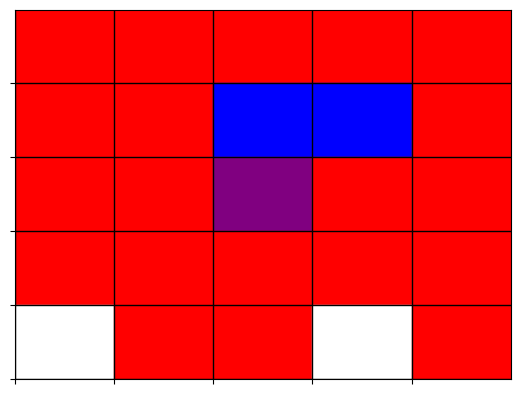

Board filled, resetting.
155


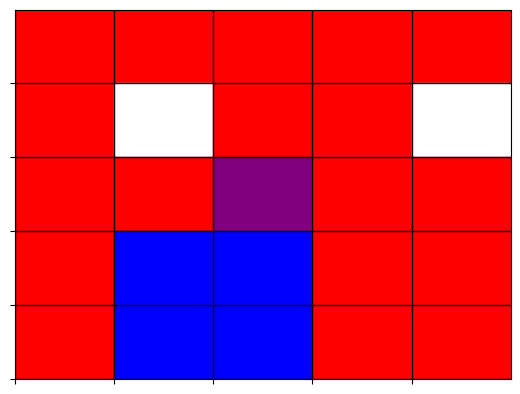

Board filled, resetting.
588


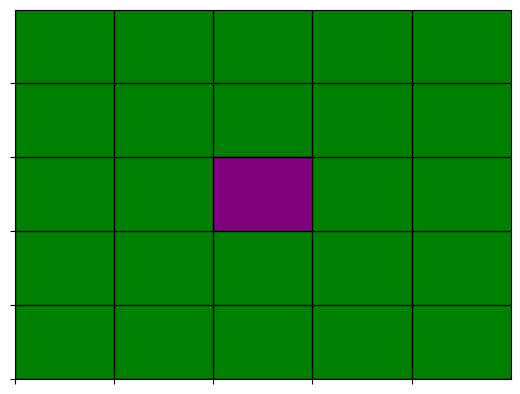

Board filled, resetting.
460


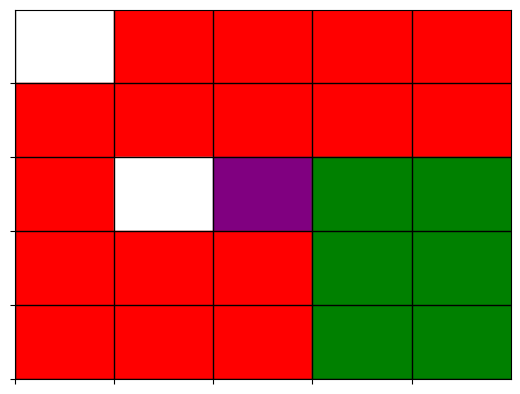

Board filled, resetting.
356


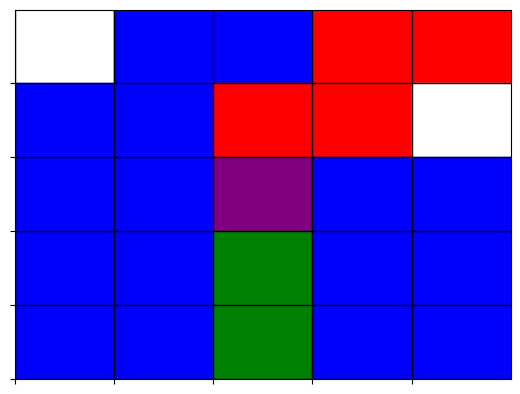

In [21]:
env = BasicTilePlacementEnv()
number_of_episode = 5
for episode in range(number_of_episode):
    env.reset()
    done = False
    number_of_step = 0
    while not done:  # Attempt to place some tiles
        action = env.action_space.sample()  # Randomly sample an action
        state, reward, done, info = env.step(action)
        number_of_step = number_of_step + 1
        if done:
            print("Board filled, resetting.")
            print(number_of_step)
    env.render()        

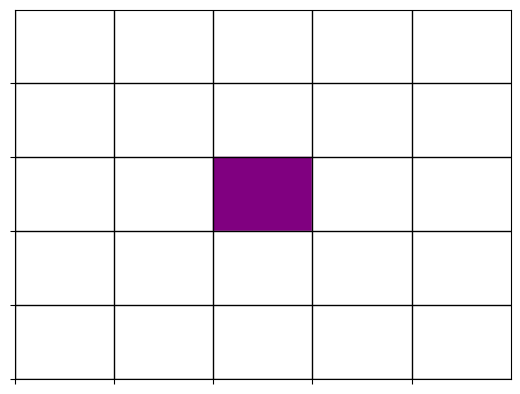

[[0, 0, 0, 0, 0], [0, 0, 0, 0, 0], [0, 0, 5, 0, 0], [0, 0, 0, 0, 0], [0, 0, 0, 0, 0]]
False


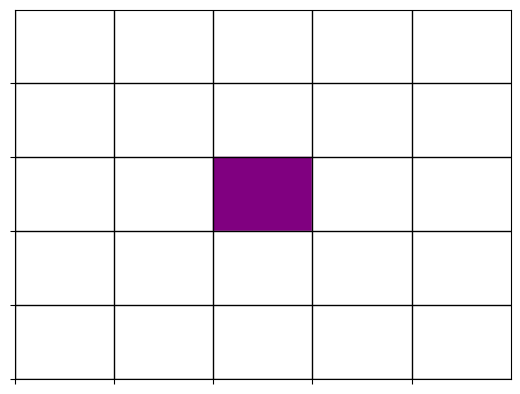

[[0, 0, 0, 0, 0], [0, 0, 0, 0, 0], [0, 0, 5, 0, 0], [0, 0, 0, 0, 0], [0, 0, 0, 0, 0]]
False


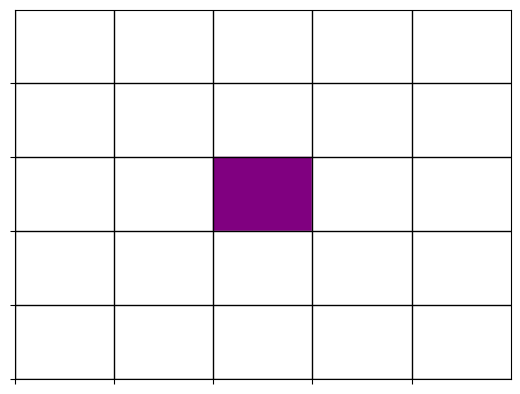

[[0, 0, 0, 0, 0], [0, 0, 0, 0, 0], [0, 0, 5, 0, 0], [0, 0, 0, 0, 0], [0, 0, 0, 0, 0]]
False


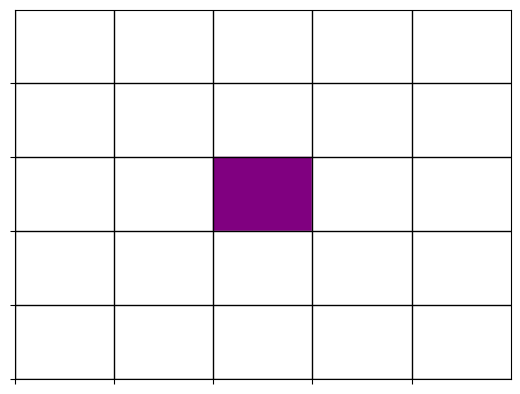

[[0, 0, 0, 0, 0], [0, 0, 0, 0, 0], [0, 0, 5, 0, 0], [0, 0, 0, 0, 0], [0, 0, 0, 0, 0]]
False


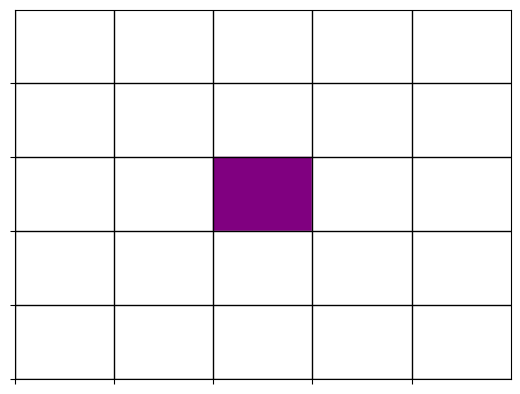

[[0, 0, 0, 0, 0], [0, 0, 0, 0, 0], [0, 0, 5, 0, 0], [0, 0, 0, 0, 0], [0, 0, 0, 0, 0]]
False


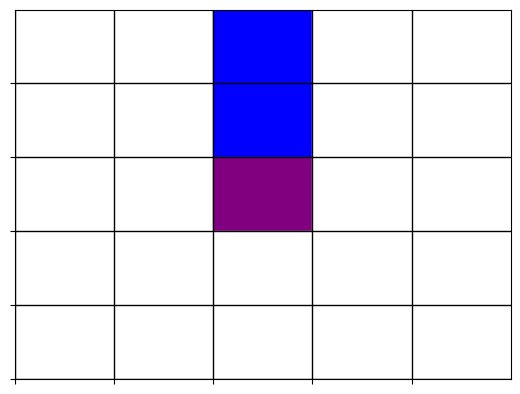

[[0, 0, 3, 0, 0], [0, 0, 3, 0, 0], [0, 0, 5, 0, 0], [0, 0, 0, 0, 0], [0, 0, 0, 0, 0]]
False


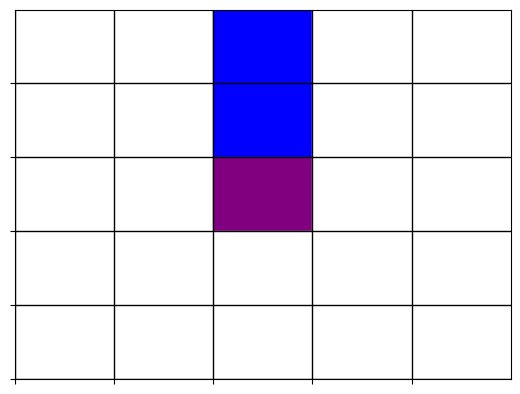

[[0, 0, 3, 0, 0], [0, 0, 3, 0, 0], [0, 0, 5, 0, 0], [0, 0, 0, 0, 0], [0, 0, 0, 0, 0]]
False


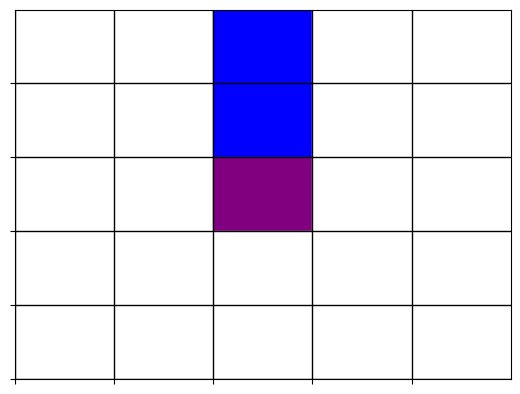

[[0, 0, 3, 0, 0], [0, 0, 3, 0, 0], [0, 0, 5, 0, 0], [0, 0, 0, 0, 0], [0, 0, 0, 0, 0]]
False


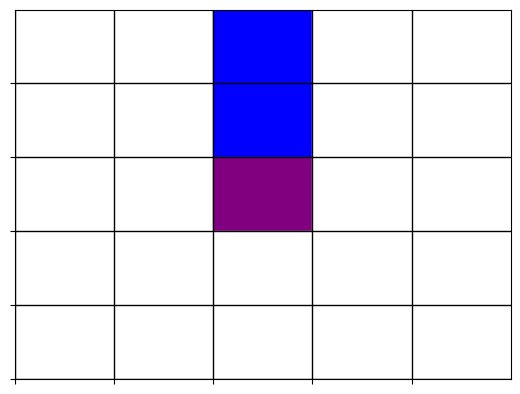

[[0, 0, 3, 0, 0], [0, 0, 3, 0, 0], [0, 0, 5, 0, 0], [0, 0, 0, 0, 0], [0, 0, 0, 0, 0]]
False


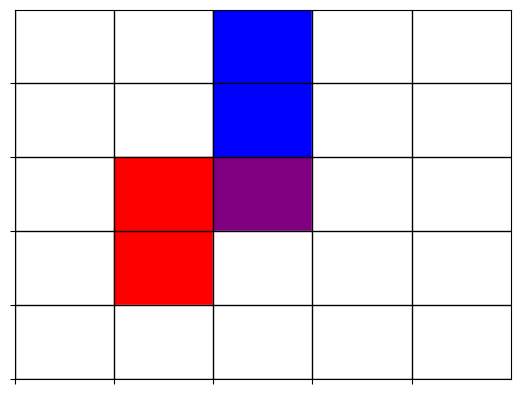

[[0, 0, 3, 0, 0], [0, 0, 3, 0, 0], [0, 1, 5, 0, 0], [0, 1, 0, 0, 0], [0, 0, 0, 0, 0]]
False


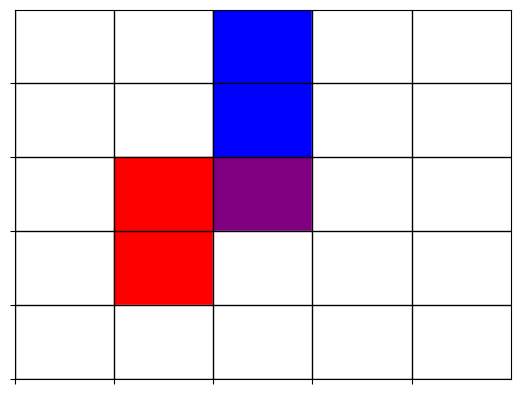

[[0, 0, 3, 0, 0], [0, 0, 3, 0, 0], [0, 1, 5, 0, 0], [0, 1, 0, 0, 0], [0, 0, 0, 0, 0]]
False


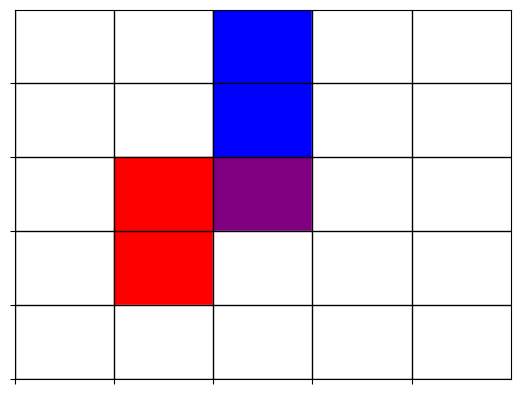

[[0, 0, 3, 0, 0], [0, 0, 3, 0, 0], [0, 1, 5, 0, 0], [0, 1, 0, 0, 0], [0, 0, 0, 0, 0]]
False


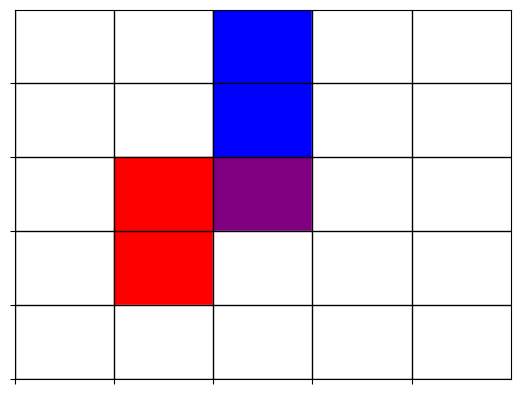

[[0, 0, 3, 0, 0], [0, 0, 3, 0, 0], [0, 1, 5, 0, 0], [0, 1, 0, 0, 0], [0, 0, 0, 0, 0]]
False


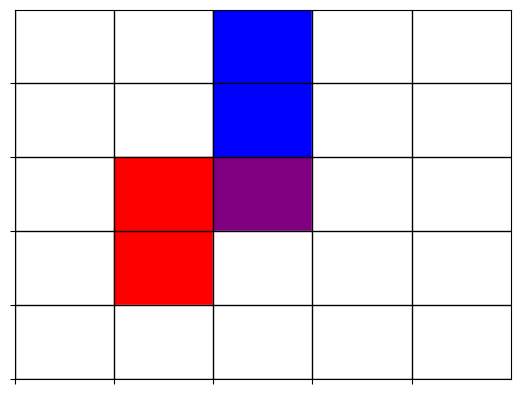

[[0, 0, 3, 0, 0], [0, 0, 3, 0, 0], [0, 1, 5, 0, 0], [0, 1, 0, 0, 0], [0, 0, 0, 0, 0]]
False


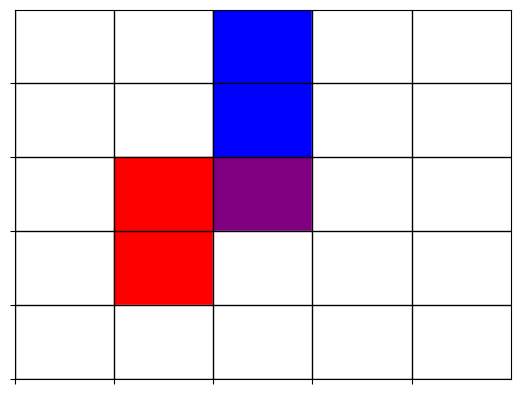

[[0, 0, 3, 0, 0], [0, 0, 3, 0, 0], [0, 1, 5, 0, 0], [0, 1, 0, 0, 0], [0, 0, 0, 0, 0]]
False


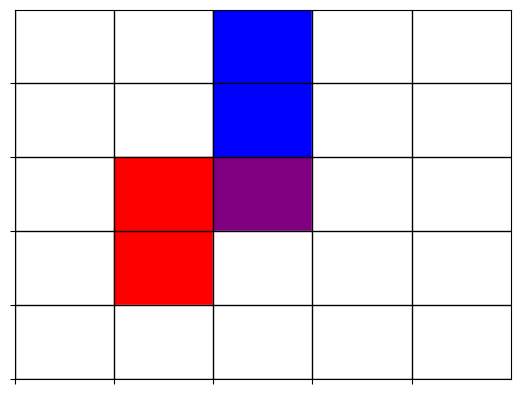

[[0, 0, 3, 0, 0], [0, 0, 3, 0, 0], [0, 1, 5, 0, 0], [0, 1, 0, 0, 0], [0, 0, 0, 0, 0]]
False


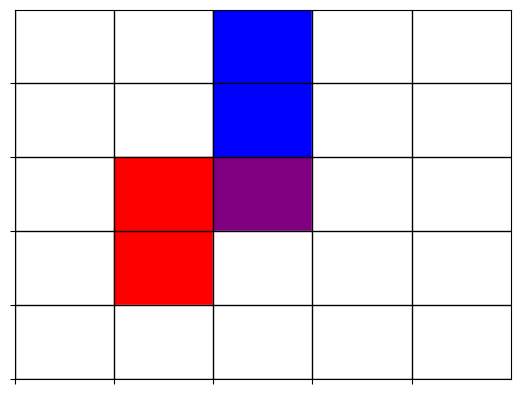

[[0, 0, 3, 0, 0], [0, 0, 3, 0, 0], [0, 1, 5, 0, 0], [0, 1, 0, 0, 0], [0, 0, 0, 0, 0]]
False


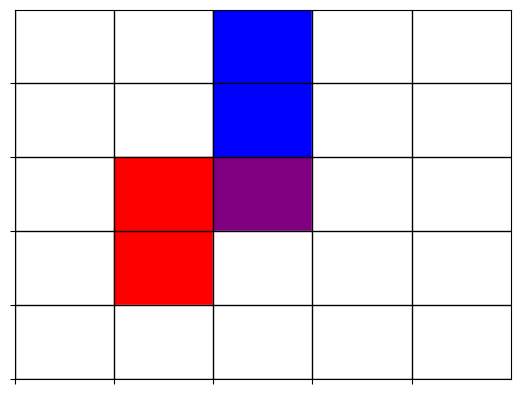

[[0, 0, 3, 0, 0], [0, 0, 3, 0, 0], [0, 1, 5, 0, 0], [0, 1, 0, 0, 0], [0, 0, 0, 0, 0]]
False


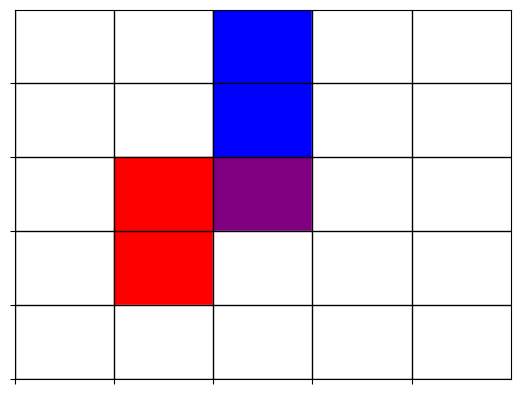

[[0, 0, 3, 0, 0], [0, 0, 3, 0, 0], [0, 1, 5, 0, 0], [0, 1, 0, 0, 0], [0, 0, 0, 0, 0]]
False


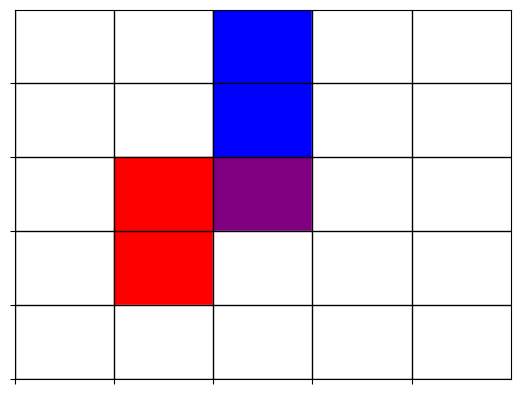

[[0, 0, 3, 0, 0], [0, 0, 3, 0, 0], [0, 1, 5, 0, 0], [0, 1, 0, 0, 0], [0, 0, 0, 0, 0]]
False


In [24]:
# Create an instance of the environment
env = BasicTilePlacementEnv()

# Initialize the environment
state = env.reset()

# Number of steps to simulate
num_steps = 20

# Simulate some steps and render the state after each step
for _ in range(num_steps):
    action = env.action_space.sample()  # Randomly sample an action
    state, reward, done, info = env.step(action)
    env.render()  # Visualize the current state
    print(state)
    print(done)
    
    if done:
        print("The board is filled or a terminal state is reached.")
        break
        

In [20]:
env.action_space.sample()  # Randomly sample an action


(4, 1, 2, 2)

Testing bicolor dominos

In [ ]:
import gymnasium as gym
from gymnasium import spaces
import matplotlib.pyplot as plt
import numpy as np

class BasicTilePlacementEnv(gym.Env):
    def __init__(self):
        super(BasicTilePlacementEnv, self).__init__()
        self.board_size = 5
        # Extend the action space to include two colors for the domino
        self.action_space = spaces.Tuple((
            spaces.Discrete(self.board_size),  # x coordinate
            spaces.Discrete(self.board_size),  # y coordinate
            spaces.Discrete(4),                # orientation (up, down, left, right)
            spaces.Discrete(4),                # tile color 1 (1, 2, 3, 4)
            spaces.Discrete(4)                 # tile color 2 (1, 2, 3, 4)
        ))
        self.observation_space = spaces.Box(low=0, high=5,
                                            shape=(self.board_size, self.board_size, 2),  # Note the change here to accommodate bicolor tiles
                                            dtype=int)
        self.state = None


    def is_valid_placement(self, start, direction, tile_color):
        # Assume tile_color parameter is passed, indicating the color of the domino being placed.
        # Calculate the second tile's position based on direction
        if direction == 'up':
            end = (start[0] - 1, start[1])
        elif direction == 'down':
            end = (start[0] + 1, start[1])
        elif direction == 'left':
            end = (start[0], start[1] - 1)
        elif direction == 'right':
            end = (start[0], start[1] + 1)
        else:
            return False  # Invalid direction

        # Check for out-of-bounds or overlapping tiles
        if not (0 <= end[0] < self.board_size and 0 <= end[1] < self.board_size):
            return False
        if self.state[start[0]][start[1]] != 0 or self.state[end[0]][end[1]] != 0:
            return False

        # Adjust the touching check for color or special tile
        touching = False
        for dx, dy in [(-1, 0), (1, 0), (0, -1), (0, 1)]:
            adj_cell = (start[0] + dx, start[1] + dy)
            if 0 <= adj_cell[0] < self.board_size and 0 <= adj_cell[1] < self.board_size:
                if self.state[adj_cell[0]][adj_cell[1]] == tile_color or self.state[adj_cell[0]][adj_cell[1]] == 5:
                    touching = True
        if not touching:
            return False

        return True


    def check_game_over(self):
        # Vérifie s'il reste des cases vides
        #for row in self.state:
            #if 0 in row:
                #return False

            # Vérifie s'il existe encore des mouvements valides
            for i in range(len(self.state)):
                for j in range(len(self.state[0])):
                    if self.state[i][j] == 0:
                        # Vérifie les cases adjacentes (haut, bas, gauche, droite)
                        if (i > 0 and self.state[i - 1][j] == 0) or \
                           (i < len(self.state) - 1 and self.state[i + 1][j] == 0) or \
                           (j > 0 and self.state[i][j - 1] == 0) or \
                           (j < len(self.state[0]) - 1 and self.state[i][j + 1] == 0):
                            return False

            # Si aucune case vide n'est trouvée et aucun mouvement valide n'est possible, le jeu est terminé
            return True

        def step(self, action):
        # Decode the action into position (x, y), orientation, and two tile colors
        x, y, orientation, tile_color_1, tile_color_2 = action
        directions = ['up', 'down', 'left', 'right']
        direction = directions[orientation]

        if not self.is_valid_placement((x, y), direction, tile_color_1, tile_color_2):
            return self.state, -1, False, {"reason": "Invalid placement"}

        # Determine the second tile's position based on the direction
        second_tile = {
            'up': (x - 1, y),
            'down': (x + 1, y),
            'left': (x, y - 1),
            'right': (x, y + 1)
        }[direction]

        # Place the domino on the board with respective colors
        # Adjust your state representation as needed to accommodate bicolor placement
        self.state[x][y][0] = tile_color_1  # Assuming [0] for the first tile color
        self.state[second_tile[0]][second_tile[1]][1] = tile_color_2  # Assuming [1] for the second tile color

        done = self.check_game_over()
        reward = 1
        info = {}

        return self.state, reward, done, info





    def reset(self):
        # Reset the environment to an initial state
        self.state = [[0 for _ in range(self.board_size)] for _ in range(self.board_size)]
        
        # Set the center position to 1
        center_row = self.board_size // 2
        center_col = self.board_size // 2
        self.state[center_row][center_col] = 5

        return self.state  # Return the initial state

    

    def render(self, mode='human'):
        fig, ax = plt.subplots()
        ax.set_xlim(0, self.board_size)
        ax.set_ylim(0, self.board_size)
        ax.set_xticks(np.arange(0, self.board_size, 1))
        ax.set_yticks(np.arange(0, self.board_size, 1))

        # Draw gridlines
        ax.grid(which='both', color='k', linestyle='-', linewidth=1)
        ax.set_xticklabels([])
        ax.set_yticklabels([])

        # Define a color map for the tiles, including the special tile
        color_map = {
            0: 'white',  # Empty
            1: 'red',    # Color 1
            2: 'green',  # Color 2
            3: 'blue',   # Color 3
            4: 'yellow', # Color 4
            5: 'purple'  # Special tile
        }

        # Fill in tiles with corresponding colors
        for x in range(self.board_size):
            for y in range(self.board_size):
                tile_value = self.state[x][y]
                tile_color = color_map[tile_value]
                ax.add_patch(plt.Rectangle((y, self.board_size - x - 1), 1, 1, fill=True, color=tile_color))

        plt.show()



## Building an Agent

In [11]:
import numpy as np

class QLearningAgent:
    def __init__(self, state_size, action_size, learning_rate=0.1, discount_rate=0.95, exploration_rate=1.0, exploration_decay=0.99, min_exploration_rate=0.01):
        self.state_size = state_size
        self.action_size = action_size
        self.learning_rate = learning_rate
        self.discount_rate = discount_rate
        self.exploration_rate = exploration_rate
        self.exploration_decay = exploration_decay
        self.min_exploration_rate = min_exploration_rate
        self.q_table = np.zeros((state_size, action_size))
    
    def act(self, state):
        if np.random.rand() < self.exploration_rate:
            return np.random.randint(self.action_size)  # Explore
        else:
            return np.argmax(self.q_table[state])  # Exploit
    
    def update(self, state, action, reward, next_state, done):
        if not done:
            max_future_q = np.max(self.q_table[next_state])
            current_q = self.q_table[state, action]
            new_q = current_q + self.learning_rate * (reward + self.discount_rate * max_future_q - current_q)
            self.q_table[state, action] = new_q
        
        # Update exploration rate
        self.exploration_rate = max(self.min_exploration_rate, self.exploration_rate * self.exploration_decay)


In [12]:
total_episodes = 1000  # Define the total number of episodes for training
max_steps_per_episode = 100  # Define the maximum steps per episode

# Initialize the agent
agent = QLearningAgent(state_size=env.observation_space.n, action_size=env.action_space.n)

# Training loop
for episode in range(total_episodes):
    state = env.reset()  # Reset the environment for a new episode
    done = False
    total_rewards = 0
    
    for step in range(max_steps_per_episode):
        action = agent.act(state)  # Choose an action
        next_state, reward, done, info = env.step(action)  # Take the action
        agent.update(state, action, reward, next_state, done)  # Update Q-table
        
        state = next_state
        total_rewards += reward
        
        if done:
            break
    
    print(f"Episode: {episode}, Total Reward: {total_rewards}, Exploration Rate: {agent.exploration_rate}")


AttributeError: 'Box' object has no attribute 'n'